In [1]:
import os
import detect_craters_with_model
from keras.models import load_model
import pandas as pd

Using TensorFlow backend.


In [2]:
model = load_model("/mnt/disks/disk0/deep_moon_working_dir/data/Silburt/model_keras2.h5")


W0923 19:27:38.722544 139839109052160 deprecation_wrapper.py:119] From /mnt/disks/disk0/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0923 19:27:38.745566 139839109052160 deprecation_wrapper.py:119] From /mnt/disks/disk0/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0923 19:27:38.784820 139839109052160 deprecation_wrapper.py:119] From /mnt/disks/disk0/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0923 19:27:38.900297 139839109052160 deprecation_wrapper.py:119] From /mnt/disks/disk0/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:2018: The name tf.image.resize_nearest_neighbor is deprecated. Please use tf.comp

In [5]:
data_path = '../../data/test_coordinates_-63_-45_-18_-6/'
all_craters = pd.read_csv('{}craters_table.csv'.format(data_path)).round(6).sort_values(by=['Diameter (km)'])

,Diameter (km),Lat,Long
25,5.135961,-14.463670,-59.274841
64,5.148897,-6.667250,-49.329673
36,5.157476,-12.893247,-52.313055
52,5.246916,-10.007792,-60.296783
65,5.302346,-6.509318,-58.235275
5,5.310460,-17.220724,-56.014208
21,5.360391,-15.338417,-56.142850
39,5.509068,-12.738669,-52.683387
14,5.544234,-16.076466,-49.144983
12,5.626536,-16.659507,-56.781925


In [11]:
import numpy as np
craters_num = len(all_craters)
all_folders = [x[0] for x in os.walk(data_path)][1:]
folders_num = len(all_folders)
mat = np.zeros((craters_num, folders_num))
for i in range(folders_num):
    f = all_folders[i]
    print(f)
    arr = detect_craters_with_model.get_detected_craters_from_path(all_craters, f, model)
    mat[:,i] = arr

../../data/test_coordinates_-63_-45_-18_-6/ws_2000_ol_400
../../data/test_coordinates_-63_-45_-18_-6/ws_3072_ol_600
../../data/test_coordinates_-63_-45_-18_-6/ws_1000_ol_200
../../data/test_coordinates_-63_-45_-18_-6/ws_500_ol_100


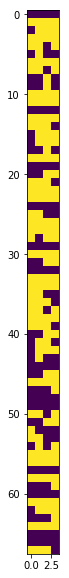

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(1,10))
plt.imshow(mat[:,[3,2,0,1]])

    Diameter (km)        Lat       Long
25       5.135961 -14.463670 -59.274841
64       5.148897  -6.667250 -49.329673
36       5.157476 -12.893247 -52.313055
52       5.246916 -10.007792 -60.296783
65       5.302346  -6.509318 -58.235275
5        5.310460 -17.220724 -56.014208
21       5.360391 -15.338417 -56.142850
39       5.509068 -12.738669 -52.683387
14       5.544234 -16.076466 -49.144983
12       5.626536 -16.659507 -56.781925
3        5.846397 -17.605077 -54.518913
35       5.948998 -13.251593 -57.460817
47       5.999559 -11.400227 -57.404517
6        6.052703 -17.219206 -53.570475
7        6.110479 -17.202458 -57.716437
11       6.128406 -16.675080 -58.436251
32       6.463110 -13.790243 -48.174872
38       6.570433 -12.757240 -52.254883
53       6.685829  -9.414408 -59.566770
13       6.924255 -16.214016 -59.944277
4        7.101035 -17.244046 -58.480277
57       7.159251  -8.533217 -54.981929
27       7.225351 -14.330749 -46.340035
50       7.263883 -10.388192 -57.466647


In [26]:
sum(mat[:,3])

35.0